<a href="https://colab.research.google.com/github/ephantusGachomba/Spam-Emails-detector/blob/main/week9_core_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing our libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#model libraries
from sklearn.naive_bayes import MultinomialNB , GaussianNB

#train/test split
from sklearn.model_selection import train_test_split

#Metrics
from sklearn.metrics import confusion_matrix

# Reading our dataset

In [2]:
names = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over',
        'word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail', 'word_freq_receive','word_freq_will',
        'word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email',
         'word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp',
         'word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857',
         'word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts',
         'word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',
         'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[',
         'char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest',
         'capital_run_length_total','spam']

df = pd.read_csv("/content/spambase.data", names=names)
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
df.shape

(4601, 58)

# Pre processing our data

In [4]:
#Checking for any missing values
df.isnull().sum().sum()

0

In [5]:
#Checking for duplicates
df.duplicated().sum()

391

In [6]:
#dropping the duplicates
df.drop_duplicates(inplace=True)

# Exploratory data analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Spam distribution')

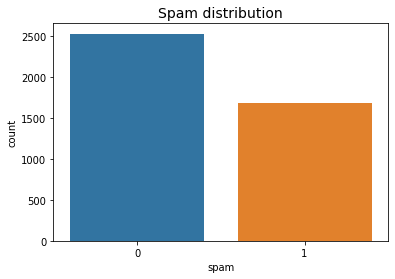

In [7]:
#Distribution of target variable
sns.countplot(df.spam)
plt.title("Spam distribution", fontdict={'size':14})

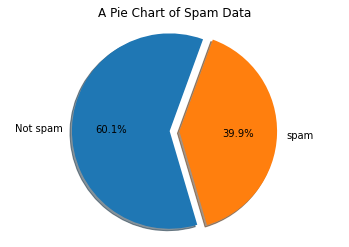

In [8]:
#Pie Chart for distribution of spam messages

#Values
value = df.spam.value_counts().values

#Labels
labels = ['Not spam', 'spam']

#Plotting the pie chart
plt.pie(value, labels=labels, autopct='%1.1f%%', shadow=True, explode=(0,0.1) , startangle=70 )
plt.axis('equal')
plt.title("A Pie Chart of Spam Data")
plt.show()

# 1. Train-test 80--20

In [22]:
#Splitting our features Independent and the dependent variables

X = df.drop('spam',axis=1)
y = df['spam']

In [23]:
#train/test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=0)


In [24]:
print(f"X_train1 shape : {X_train1.shape}")
print(f"X_test1 shape : {X_test1.shape}")
print(f"y_train1 shape : {y_train1.shape}")
print(f"y_test1 shape : {y_test1.shape}")

X_train1 shape : (3368, 57)
X_test1 shape : (842, 57)
y_train1 shape : (3368,)
y_test1 shape : (842,)


In [26]:
#Fitting our model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

model = clf.fit(X_train1, y_train1)

#Predicting 
y_pred1 = model.predict(X_test1)

#Evaluating performance of model
print(np.mean(y_pred1 == y_test1))

0.8206650831353919


# 2. Train-test 70-30

In [27]:
#train/test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=.3, random_state=0)

In [28]:
#fit model
model.fit(X_train2, y_train2)

#Evaluating the performance of the model
y_pred2 = model.predict(X_test2)
print(np.mean(y_pred2 == y_test2))

0.833729216152019


## hyperparameter tuning

In [29]:
#Splitting our features Independent and the dependent variables
X = df.drop('spam',axis=1)
y = df['spam']

In [30]:
#train/test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=.3, random_state=0)

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.fit_transform(X_test2)

In [32]:
#fit model
model.fit(X_train2, y_train2)

#Evaluating the performance of the model
y_pred2 = model.predict(X_test2)
print(np.mean(y_pred2 == y_test2))

0.833729216152019


In [33]:
print(confusion_matrix(y_test2, y_pred2))

[[551 186]
 [ 24 502]]
